# Exploring JOINs

In [1]:
%load_ext sql
%sql postgres://isdb16@localhost/postgres

'Connected: isdb16@postgres'

### _The idea behind a JOIN is to take rows from 2 tables and to combine them using some criteria.  Based on the criteria, used we get different types of joins (inner, left, right, etc)._

Consider the below two tables.

In [2]:
%%sql

DROP TABLE IF EXISTS Students;
DROP TABLE IF EXISTS Majors;

CREATE TABLE Students (
    PRIMARY KEY(sid),
    sid     integer,
    name    text,
    major   integer
);

CREATE TABLE Majors (
    PRIMARY KEY(mid),
    mid      integer,
    name     text
);


INSERT INTO Students VALUES
    (1, 'Jack', 1),
    (2, 'Jill', 2),
    (3, 'Bill', 3),
    (4, 'Pat',  4);
    
INSERT INTO Majors VALUES
    (1, 'Information Systems'),
    (2, 'Statistics'),
    (3, 'Business'),
    (5, 'History');


Done.
Done.
Done.
Done.
4 rows affected.
4 rows affected.


[]

### The most common form of JOIN is based on testing a field (known as the foreign key) against another table's primary key

In [3]:
%%sql

SELECT * 
  FROM Students as s
       JOIN Majors as m
       ON s.major = m.mid;

3 rows affected.


sid,name,major,mid,name_1
1,Jack,1,1,Information Systems
2,Jill,2,2,Statistics
3,Bill,3,3,Business


Note that in the above table the value of `major` equals tha value of `mid`

But, in general the ON test can be any arbitary boolean expression, as below.  Please keep in mind that the resulting table is **arbitary** (doesn't have any particular meaning).

In [4]:
%%sql

SELECT * 
  FROM Students as s
       JOIN Majors as m
       ON s.sid + m.mid > 4;

10 rows affected.


sid,name,major,mid,name_1
4,Pat,4,1,Information Systems
3,Bill,3,2,Statistics
4,Pat,4,2,Statistics
2,Jill,2,3,Business
3,Bill,3,3,Business
4,Pat,4,3,Business
1,Jack,1,5,History
2,Jill,2,5,History
3,Bill,3,5,History
4,Pat,4,5,History


### How many possible types of JOINs are there?

We can use a Venn diagram to help us answer this question.  Suppose we have two tables T1 and T2  (Students and Majors in this particular case).  Represented by two overlapping circles.  The intersecting area represents those records for which the ON condition is True.  The diagram is below:

``` 

     T1
    +-------------------------+
    |                         |
    |                         |                                   +-------------------------+     
    |     1                   |          T2                       |                         |
    |             +-----------+-------------+                     |                         |
    |             |           |             |                     |                         |
    |             |           |             |      ==>            |                         |
    |             |     2     |             |                     |       T1 join T2        |
    |             |           |             |                     |                         |
    +-------------+-----------+             |                     |                         |
                  |                         |                     |                         |
                  |                3        |                     |                         |
                  |                         |                     +-------------------------+
                  |                         |
                  +-------------------------+

```

Given these 3 areas, we have 7 different ways we can combine them, which we denote by binary numbers

```
1  2  3
0  0  1
0  1  0  ....  inner join
0  1  1  ....  right join
1  0  0
1  0  1
1  1  0  ....  left join
1  1  1  ....  full 
```

### The most common form of join:  INNER JOIN
`"inner join"`  and just `"join"` are synonymous

In [5]:
%%sql
-- 010

SELECT * 
  FROM Students as s
       JOIN Majors as m
       ON s.sid = m.mid;

3 rows affected.


sid,name,major,mid,name_1
1,Jack,1,1,Information Systems
2,Jill,2,2,Statistics
3,Bill,3,3,Business


### The next most common join:  LEFT JOIN

`"left join"` and `"left outer join"` are synonymous.

Two step process (1) form the `inner join`  (2) which ever row in the "left" table has not participated in the inner join, include it in the _result set_ with null values

In [6]:
%%sql
-- 110

SELECT s.sid, s.name, s.major, 
       m.mid, m.name
  FROM Students as s
       LEFT JOIN Majors as m
       ON s.sid = m.mid;

4 rows affected.


sid,name,major,mid,name_1
1,Jack,1,1,Information Systems
2,Jill,2,2,Statistics
3,Bill,3,3,Business
4,Pat,4,None,None


### Paralleling the left join we have the RIGHT JOIN

`"right join"` and `"right outer join"` are synonymous.

Again, it is a two step process (1) form the `inner join`  (2) which ever row from the "right" table has not participated in the inner join, included it the _result set_ with null values


In [7]:
%%sql
-- 011

SELECT s.sid, s.name, s.major, 
       m.mid, m.name
  FROM Students as s
       RIGHT JOIN Majors as m
       ON s.sid = m.mid

4 rows affected.


sid,name,major,mid,name_1
1,Jack,1,1,Information Systems
2,Jill,2,2,Statistics
3,Bill,3,3,Business
None,None,None,5,History


### The remaining four joins have names (included in the diagram below).  But more than the names, ensure you understand which areas they cover and why

In [8]:
%%sql
-- 001

SELECT * 
  FROM Students as s
       RIGHT JOIN Majors as m
       ON s.sid = m.mid
 WHERE s.name is NULL

1 rows affected.


sid,name,major,mid,name_1
None,None,None,5,History


In [9]:
%%sql
-- 100

SELECT s.sid, s.name, s.major, 
       m.mid, m.name
  FROM Students as s
       LEFT JOIN Majors as m
       ON s.sid = m.mid
 WHERE m.mid is NULL


1 rows affected.


sid,name,major,mid,name_1
4,Pat,4,None,None


In [10]:
%%sql
-- 101

SELECT s.sid, s.name, s.major, 
       m.mid, m.name
  FROM Students as s
       FULL JOIN Majors as m
       ON s.sid = m.mid
 WHERE m.mid is NULL or s.sid is NULL


2 rows affected.


sid,name,major,mid,name_1
None,None,None,5,History
4,Pat,4,None,None


In [11]:
%%sql
-- 111

SELECT s.sid, s.name, s.major, 
       m.mid, m.name
  FROM Students as s
       FULL JOIN Majors as m
       ON s.sid = m.mid

5 rows affected.


sid,name,major,mid,name_1
1,Jack,1,1,Information Systems
2,Jill,2,2,Statistics
3,Bill,3,3,Business
None,None,None,5,History
4,Pat,4,None,None


[title](SQL_Joins.svg)

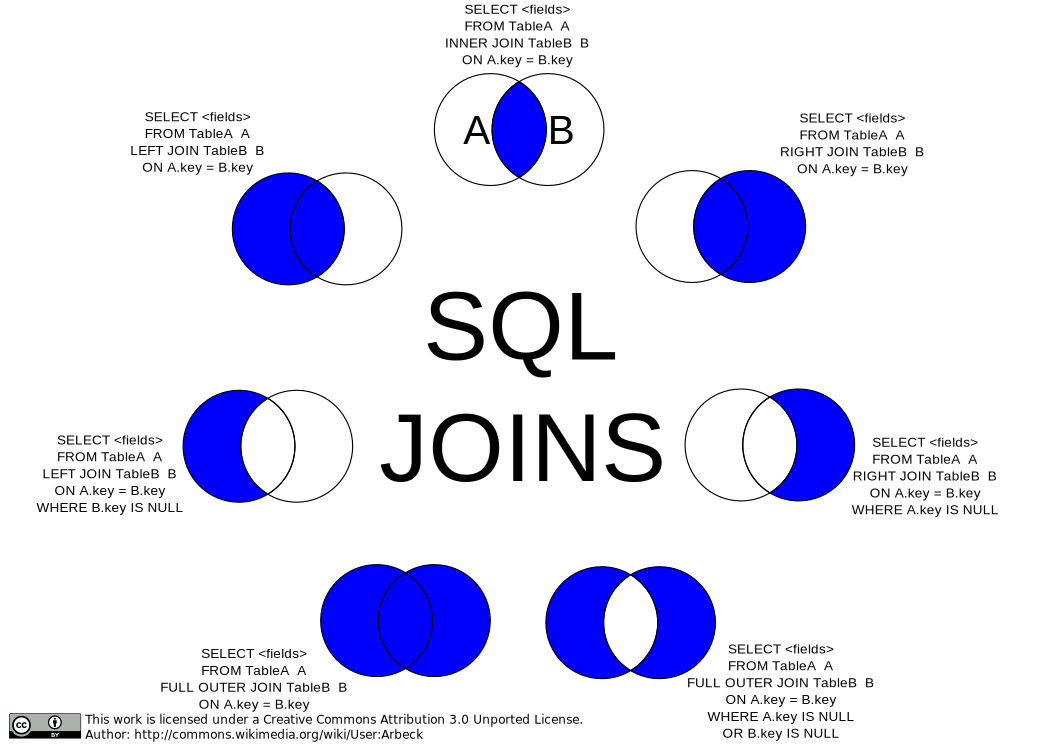

In [12]:
from IPython.display import SVG
SVG(url='https://upload.wikimedia.org/wikipedia/commons/9/9d/SQL_Joins.svg')